# Deep Learning - Hidden Layers

https://www.youtube.com/watch?v=UCG1FuKmIOs

## Why do we stack layers 
(adapted from http://stats.stackexchange.com/questions/63152/what-does-the-hidden-layer-in-a-neural-network-compute)

Let's call the input vector $x$, the hidden layer activations $h$, and the output activation $y$.  You have some function $f$ that maps from $x$ to $h$ and another function $g$ that maps from $h$ to $y$.  

So the hidden layer's activation is $f(x)$ and the output of the network is $g(f(x))$.

**Why have two functions ($f$ and $g$) instead of just one?**

If the level of complexity per function is limited, then $g(f(x))$ can compute things that $f$ and $g$ can't do individually.  

------

**An example with logical functions:**

For example, if we only allow $f$ and $g$ to be simple logical operators like "AND", "OR", and "NAND", then you can't compute other functions like "XOR" with just one of them.  On the other hand, we *could* compute "XOR" if we were willing to layer these functions on top of each other: 

First layer functions:

* Make sure that at least one element is "TRUE" (using OR)
* Make sure that they're not all "TRUE" (using NAND)

Second layer function:

* Make sure that both of the first-layer criteria are satisfied (using AND)

The network's output is just the result of this second function.  The first layer *transforms the inputs* into something that the second layer can use so that the whole network can perform XOR.

----

**An example with images:**

Slide 61 from [this talk](http://cs.nyu.edu/~fergus/tutorials/deep_learning_cvpr12/CVPR2012-Tutorial_lee.pdf) as a single image--shows (one way to visualize) what the different hidden layers in a particular neural network are looking for.

![cnn](images/nn.png)

The first layer looks for short pieces of edges in the image: these are very easy to find from raw pixel data, but they're not very useful by themselves for telling you if you're looking at a face or a bus or an elephant.

The next layer composes the edges: if the edges from the bottom hidden layer fit together in a certain way, then one of the eye-detectors in the middle of left-most column might turn on.  It would be hard to make a single layer that was so good at finding something so specific from the raw pixels: eye detectors are much easier to build out of edge detectors than out of raw pixels.

The next layer up composes the eye detectors and the nose detectors into faces.  In other words, these will light up when the eye detectors and nose detectors from the previous layer turn on with the right patterns.  These are very good at looking for particular kinds of faces: if one or more of them lights up, then your output layer should report that a face is present.

This is useful because **face detectors are easy to build out of eye detectors and nose detectors, but really hard to build out of pixel intensities.**

So each layer gets you farther and farther from the raw pixels and closer to your ultimate goal (e.g. face detection or bus detection).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

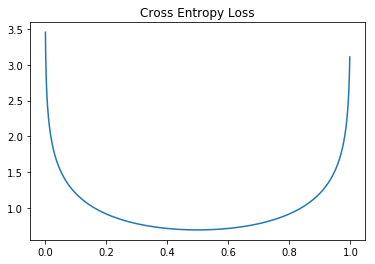

In [2]:
import numpy as np

y = 0.5
def loss(p,y):
    l = -(y*np.log(p)+(1-y)*np.log(1-p))
    return l

p = np.arange(1e-3,0.999,1e-3)

l = loss(p,y)
plt.plot(p,l)
plt.title('Cross Entropy Loss')
plt.show()

## Useful terms:

1. Activation
2. Softmax
3. Cross Entropy
4. One Hot Encoding
5. Gradient Descent

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./', one_hot=True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [4]:
x, y = mnist.train.next_batch(20)

In [5]:
x.shape

(20, 784)

In [6]:
28*28

784

In [7]:
y.shape

(20, 10)

In [8]:
y

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.

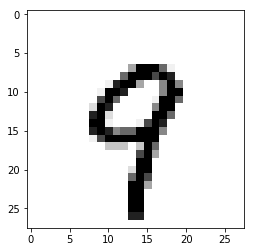

In [9]:
plt.imshow(x[1].reshape((28,28)),cmap='Greys')
plt.show()

In [10]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x,W) + b

y_true = tf.placeholder(tf.float32,[None, 10])

#   tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_ = sess.run([cross_entropy, train_step], feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0:
        print('loss: '+str(l))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
loss: 2.30258
loss: 0.442206
loss: 0.334002
loss: 0.343285
loss: 0.325086
loss: 0.300592
loss: 0.246496
loss: 0.451478
loss: 0.420783
loss: 0.264766


Softmax takes a $D$ dimensional vector and squeezes them through a function such that we have $D$ outputs whos values are positive and sums to one.
$$
\text{softmax}(\mathbf{y})_d = \frac{\exp(-y_d)}{\exp(-y_1)+...+\exp(-y_D)}
$$

In [11]:
[-2, 1]
np.exp(-2)/(np.exp(-2)+np.exp(1))

0.047425873177566788

In [12]:
# test the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.917


In [13]:
print(sess.run(accuracy, feed_dict={x: mnist.train.images, y_true: mnist.train.labels}))

0.916073


In [14]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_,a = sess.run([cross_entropy, train_step, accuracy], feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0 or (i<100 and i%10==0):
        print(str(i)+': loss: '+str(l)+' accuracy: '+str(a))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0: loss: 2.30258 accuracy: 0.0859375
10: loss: 0.970875 accuracy: 0.6875
20: loss: 0.641055 accuracy: 0.84375
30: loss: 0.511136 accuracy: 0.859375
40: loss: 0.735076 accuracy: 0.804688
50: loss: 0.509233 accuracy: 0.828125
60: loss: 0.390711 accuracy: 0.875
70: loss: 0.43777 accuracy: 0.84375
80: loss: 0.318442 accuracy: 0.921875
90: loss: 0.464599 accuracy: 0.875
100: loss: 0.49504 accuracy: 0.898438
200: loss: 0.238301 accuracy: 0.929688
300: loss: 0.380051 accuracy: 0.890625
400: loss: 0.392663 accuracy: 0.914062
500: loss: 0.218888 accuracy: 0.9375
600: loss: 0.314164 accuracy: 0.921875
700: loss: 0.325308 accuracy: 0.921875
800: loss: 0.313457 accuracy: 0.914062
900: loss: 0.311485 accuracy: 0.898438


## Hidden Layered Network

In [15]:
def fully_conntected_activation(input,size_in,size_out):
    # Initialise variables
    W = tf.Variable(tf.truncated_normal([size_in, size_out],stddev=0.1))
    b = tf.Variable(tf.truncated_normal([size_out], stddev=0.1))
    # NN part
    activation = tf.nn.relu(tf.matmul(input,W)+b)
    
    return activation

def fully_conntected(input,size_in,size_out):
    # Initialise variables
    W = tf.Variable(tf.truncated_normal([size_in, size_out],stddev=0.1))
    b = tf.Variable(tf.truncated_normal([size_out], stddev=0.1))
    # NN part
    activation = tf.matmul(input,W)+b
    
    return activation

In [16]:
x = tf.placeholder(tf.float32, [None, 784])
y_true = tf.placeholder(tf.float32,[None, 10])

hidden = fully_conntected_activation(x,784,100)
output = fully_conntected(hidden,100,10)
# output = fully_conntected(x,784,10)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=output))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# test the model
correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_,a = sess.run([cross_entropy, train_step, accuracy], 
                     feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0 or (i<100 and i%10==0):
        print(str(i)+': loss: '+str(l)+' accuracy: '+str(a))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0: loss: 2.35818 accuracy: 0.117188
10: loss: 1.11357 accuracy: 0.640625
20: loss: 0.890855 accuracy: 0.703125
30: loss: 0.51857 accuracy: 0.859375
40: loss: 0.394057 accuracy: 0.890625
50: loss: 0.511947 accuracy: 0.851562
60: loss: 0.422956 accuracy: 0.882812
70: loss: 0.310123 accuracy: 0.898438
80: loss: 0.441691 accuracy: 0.875
90: loss: 0.296006 accuracy: 0.914062
100: loss: 0.45131 accuracy: 0.859375
200: loss: 0.274302 accuracy: 0.9375
300: loss: 0.137832 accuracy: 0.945312
400: loss: 0.1415 accuracy: 0.945312
500: loss: 0.172358 accuracy: 0.945312
600: loss: 0.0739765 accuracy: 0.976562
700: loss: 0.176215 accuracy: 0.960938
800: loss: 0.143319 accuracy: 0.929688
900: loss: 0.132633 accuracy: 0.960938


In [17]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.9605


---